In [655]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## 0. Importing Libraries

In [656]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn import metrics
import bisect

import warnings
warnings.filterwarnings('ignore')

##  1. Reading data

In [657]:
#reading the data
df_train1 = pd. read_csv("/kaggle/input/titanic/train.csv")

X_test1 = pd.read_csv("/kaggle/input/titanic/test.csv")


In [658]:
X_test1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [659]:
df_train1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [660]:
df_train1.shape


(891, 12)

In [661]:
X_test1.shape

(418, 11)

In [662]:
df_train1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 2. Exploratory Data Analysis

### 2.1. Missing Values

Check if the dataset contain any missing values.

In [663]:
df_train1.isnull().sum()
#False: No missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [664]:
X_test1.isnull().sum()



PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

We can see that a lot of Cabin are missing, after analysing the csv file, we deduced that mainly class 1 passenger had assigned Cabin

### 2.2. Distribution of the target variable

Plot the distribution of the target variable.

<function matplotlib.pyplot.show(close=None, block=None)>

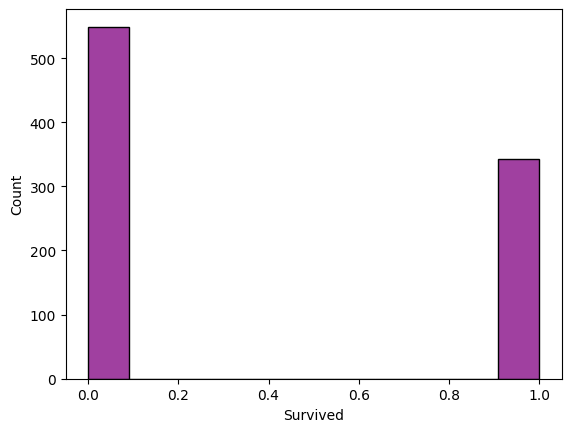

In [665]:
sns.histplot(df_train1['Survived'], color='purple')
plt.show

Plot the distribution of the numerical features.

In [666]:
numerical_features=["Age","Fare","Pclass","SibSp","Parch"]
categorical_features=["Sex","Cabin","Embarked"]

### 2.3. Distribution of numerical variables

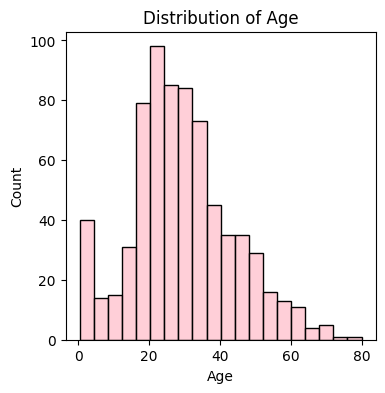

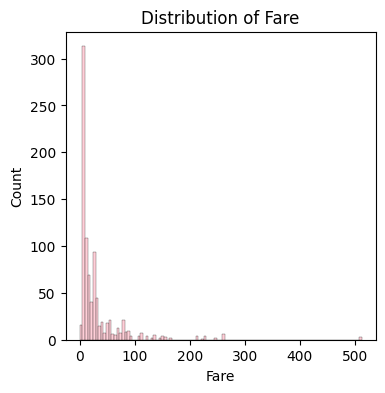

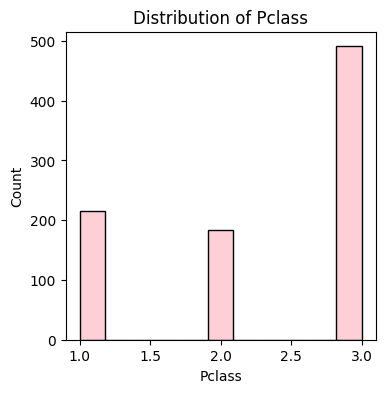

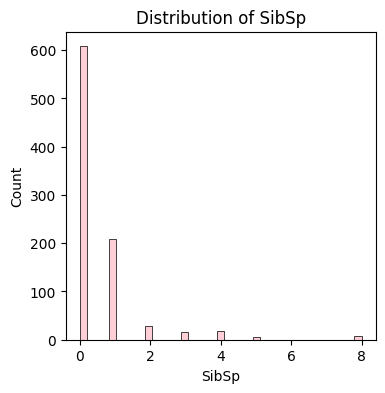

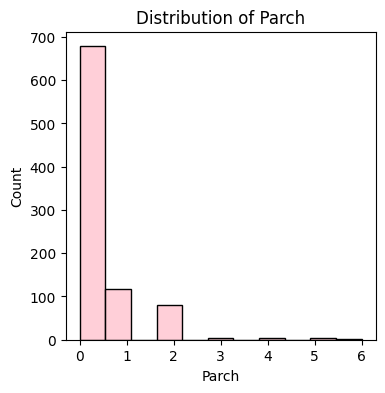

In [667]:
for x in numerical_features:
    plt.figure(figsize=(4,4))
    sns.histplot(df_train1[x], color='pink')
    plt.title(f"Distribution of {x}")
    plt.show()



### 2.4. Histogram of catagorical variables

Plot the histogram of the catagorical features.

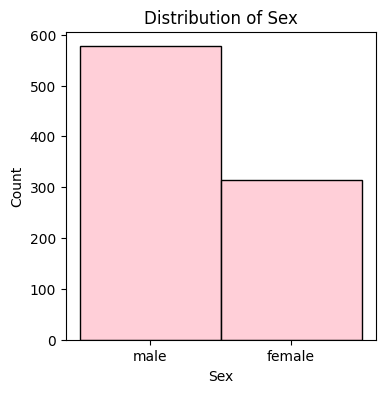

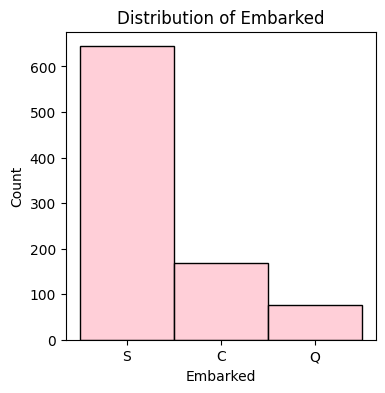

In [668]:
categorical_features_to_plot=["Sex","Embarked"]

for x in categorical_features_to_plot:
    plt.figure(figsize=(4,4))
    sns.histplot(df_train1[x],  color='pink')
    plt.title(f"Distribution of {x}")
plt.show()

## 4. Feature Engineering

### 4.0. Replacing missing values

In [669]:
# Fill missing "Age" values with the mean value
df_train1['Age'] = df_train1['Age'].fillna(df_train1['Age'].mean())
X_test1['Age'] = X_test1['Age'].fillna(df_train1['Age'].mean())  # Use training mean for consistency

# Fill missing "Cabin" values with 'Unknown'
df_train1['Cabin'] = df_train1['Cabin'].fillna('Unknown')
X_test1['Cabin'] = X_test1['Cabin'].fillna('Unknown')

# Fill missing "Embarked" values with the mode
df_train1['Embarked'] = df_train1['Embarked'].fillna(df_train1['Embarked'].mode()[0])
X_test1['Embarked'] = X_test1['Embarked'].fillna(df_train1['Embarked'].mode()[0])

# Fill missing "Fare" values with the median value
df_train1['Fare'] = df_train1['Fare'].fillna(df_train1['Fare'].median())
X_test1['Fare'] = X_test1['Fare'].fillna(df_train1['Fare'].median())  # Use training median for consistency


#### We will replace Cabin by the letter of its Deck, that means the first letter of the Cabin ID

In [670]:
#df_train1["Cabin"] = df_train1["Cabin"].apply(lambda x: x[0])
#df_train1["Cabin"].head()

In [671]:
X_test1.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### Chossing the interesting columns

In [672]:
#Drop 'Name' columns from df_train and X_test
df_train = df_train1.drop(['Name','Ticket','PassengerId'], axis=1)
X_test = X_test1.drop(['Name','Ticket','PassengerId'], axis=1)


### Creating interesting columns

In [673]:
# Add 'family_members' column to df_train and X_test
#df_train['family_members'] = df_train['Parch'] + df_train['SibSp']
#X_test['family_members'] = X_test['Parch'] + X_test['SibSp']


Unfortunately, this change made the performance worse

### Splitting the Data

In [674]:
X_train = df_train.drop(['Survived' ], axis=1)
y_train = df_train[["Survived"]]

### 4.1. Scaling numerical variables

In [675]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Convert numerical columns to numeric, ensuring any errors are coerced to NaN
X_train[numerical_features] = X_train[numerical_features].apply(pd.to_numeric, errors='coerce')
X_test[numerical_features] = X_test[numerical_features].apply(pd.to_numeric, errors='coerce')

# Fit and transform the numerical data on the training set
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

# Transform (not fit) the numerical data on the test set using the same scaler
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Display the first few rows of the processed test set
X_test.head()



,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.827377,male,0.369449,-0.474545,-0.473674,-0.490783,Unknown,Q
1,0.827377,female,1.331378,0.432793,-0.473674,-0.507479,Unknown,S
2,-0.369365,male,2.485693,-0.474545,-0.473674,-0.453367,Unknown,Q
3,0.827377,male,-0.207709,-0.474545,-0.473674,-0.474005,Unknown,S
4,0.827377,female,-0.592481,0.432793,0.767630,-0.401017,Unknown,S


### 4.2. Catagorical variables encoding

Convert catagorical columns into numerical columns using label encoding or one hot encoding.

In [676]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Iterating over all the common columns in train and test
for col in categorical_features:
    df_train[col] = le.fit_transform(df_train[col])
    X_test[col]=le.fit_transform(X_test[col])
    
X_test.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.827377,1,0.369449,-0.474545,-0.473674,-0.490783,76,1
1,0.827377,0,1.331378,0.432793,-0.473674,-0.507479,76,2
2,-0.369365,1,2.485693,-0.474545,-0.473674,-0.453367,76,1
3,0.827377,1,-0.207709,-0.474545,-0.473674,-0.474005,76,2
4,0.827377,0,-0.592481,0.432793,0.767630,-0.401017,76,2


### Splitting the Data Again

In [677]:
X_train = df_train.drop(['Survived' ], axis=1)
y_train = df_train[["Survived"]]

## 5. Random Forest

In [678]:
# Create the random grid
random_grid = { # Number of trees in random forest
               'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 400, num = 8)],
               'max_features': ['auto', 'sqrt', 'log2'],
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)] + [None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}


rf = RandomForestClassifier(criterion="gini", random_state=12)
rf_search = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=1, random_state=0)
rf_search = rf_search.fit(X_train, y_train)



Fitting 3 folds for each of 10 candidates, totalling 30 fits


Plot feature importance/weight.

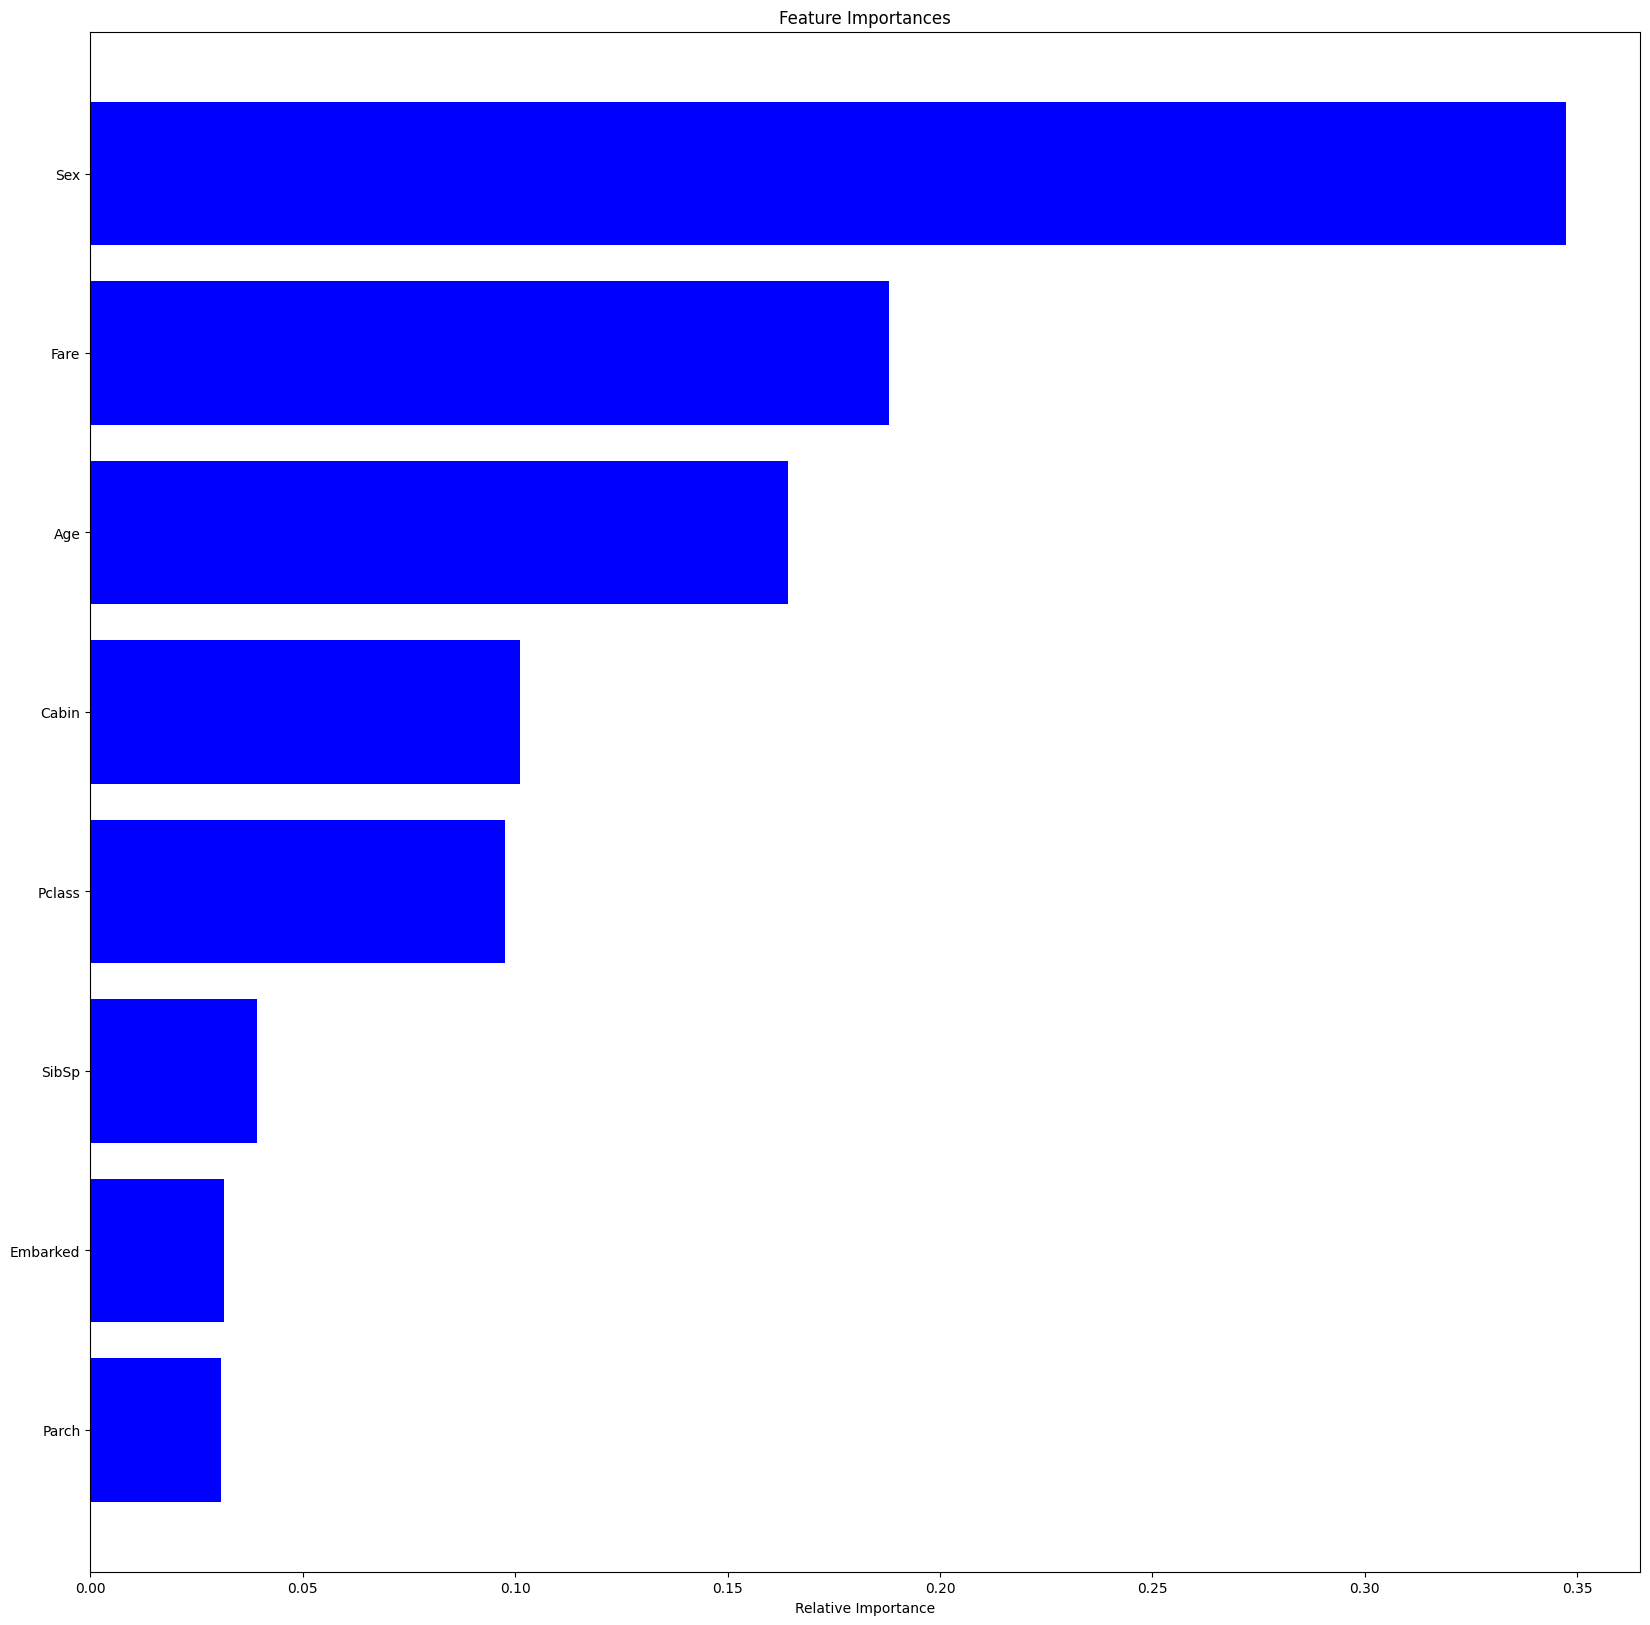

In [679]:
probs = rf_search.predict_proba(X_test)
features = X_train.columns
importances = rf_search.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20, 20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
#we can see that features: Blair, Europe, Hague and Age are the most important ones

### Saving the CSV File

In [680]:
# Predictions
y_train_pred = rf_search.predict(X_train)
y_test_pred = rf_search.predict(X_test)

# Calculate the score
train_score = rf_search.score(X_train, y_train)
print("Training Score:", train_score)

# Prepare the result DataFrame and set PassengerId as the index
result = pd.DataFrame({"PassengerId": X_test1["PassengerId"], "Survived": y_test_pred})
result.set_index("PassengerId", inplace=True)

csv_path = "/kaggle/working/result.csv"

# Save the result to a new CSV file
result.to_csv(csv_path, index=True)  # `index=True` ensures PassengerId is saved as the index

# Display the result DataFrame
result.head()


Training Score: 0.9450056116722784


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


## 6. Gradient Boosting

In [681]:
# Create the random grid
random_grid = { # Number of trees in gradient boost
               'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 400, num = 8)],
                # Number of features to consider at every split
               'max_features': ['auto', 'sqrt', 'log2'],
                # Maximum number of levels in tree
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)] + [None],
                # Minimum number of samples required to split a node
               'min_samples_split': [2, 5, 10],
                # Minimum number of samples required at each leaf node
               'min_samples_leaf': [1, 2, 4],
               'learning_rate': [0.1, 1],
               'subsample': [0.5, 0.7, 0.9]}

print(random_grid)
gb = GradientBoostingClassifier(random_state=0)
gb_search = RandomizedSearchCV(estimator = gb, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=1, random_state=0)
gb_search = gb_search.fit(X_train, y_train)

{'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'learning_rate': [0.1, 1], 'subsample': [0.5, 0.7, 0.9]}
Fitting 3 folds for each of 10 candidates, totalling 30 fits


### Saving the CSV file

In [682]:
# Predictions
y_train_pred2 = gb_search.predict(X_train)
y_test_pred2 = gb_search.predict(X_test)

# Calculate the score
train_score2 = gb_search.score(X_train, y_train)
print("Training Score:", train_score2)

# Prepare the result DataFrame and set PassengerId as the index
result2 = pd.DataFrame({"PassengerId": X_test1["PassengerId"], "Survived": y_test_pred2})
result2.set_index("PassengerId", inplace=True)

csv_path = "/kaggle/working/result2.csv"

# Save the result to a new CSV file
result2.to_csv(csv_path, index=True)  # `index=True` ensures PassengerId is saved as the index

# Display the result DataFrame
result2.head()

Training Score: 0.9820426487093153


,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


## 7. Logistic Regression

In [683]:
param_grid = {'penalty': ['l1', 'l2', 'none'],
              'C': [0.001, 0.01, 0.02, 0.03, 0.05, 0.08, 0.1, 0.2, 0.3, 0.5, 1, 10]}

logR = LogisticRegression(random_state=42, fit_intercept=True)
search = GridSearchCV(logR, param_grid, scoring='accuracy', cv=5)
search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.02, 0.03, 0.05, 0.08, 0.1, 0.2,
                               0.3, 0.5, 1, 10],
                         'penalty': ['l1', 'l2', 'none']},
             scoring='accuracy')

### Saving the CSV File

In [684]:
# Predictions
y_train_pred4 = search.predict(X_train)
y_test_pred4 = search.predict(X_test)

# Calculate the score
train_score4 = gb_search.score(X_train, y_train)
print("Training Score:", train_score4)

# Prepare the result DataFrame and set PassengerId as the index
result4 = pd.DataFrame({"PassengerId": X_test1["PassengerId"], "Survived": y_test_pred4})
result4.set_index("PassengerId", inplace=True)

csv_path = "/kaggle/working/result4.csv"

# Save the result to a new CSV file
result4.to_csv(csv_path, index=True)  # `index=True` ensures PassengerId is saved as the index

# Display the result DataFrame
result4.head()

Training Score: 0.9820426487093153


,Survived
PassengerId,
892,1
893,1
894,1
895,1
896,1


## 8. Combining 3 ML algorithms

In [685]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_search.best_estimator_),
        ('gb', gb_search.best_estimator_),
        ('lr', search.best_estimator_)  
    ],
    voting='soft'
)
voting_clf.fit(X_train, y_train)



VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=False,
                                                     max_depth=110,
                                                     min_samples_leaf=2,
                                                     min_samples_split=5,
                                                     n_estimators=200,
                                                     random_state=12)),
                             ('gb',
                              GradientBoostingClassifier(max_depth=60,
                                                         max_features='auto',
                                                         min_samples_split=5,
                                                         n_estimators=50,
                                                         random_state=0,
                                                         subsample=0.5)),
                             ('lr',
                              LogisticRegression(C=0.3, random_state=42))],
                 voting='soft')

## 9. Conclusion

After submitting each result we conclude that Random forest is the best option